##### 分析Dataframe來決定如何取資料集
##### 1. ENVIRONMENT_ID 有 27種組合
##### 2. ATTACK_ID 有 10種組合

In [1]:
import pandas

# 請將以下路徑替換為您的CSV檔案路徑
csv_file_path = './dataset/PA/PA/ASVspoof2019_PA_cm_protocols/ASVspoof2019_PA_cm_dev_trl.csv'

df = pandas.read_csv(csv_file_path)
print(df.head())
print()

# 印出ENVIRONMENT_ID跟ATTACK_ID的唯一值
# 創建一個集合來存儲不同的ENVIRONMENT_ID值
environment_ids = set()

# 遍歷DataFrame中的每一行，將ENVIRONMENT_ID列的值添加到集合中
for env_id in df['ENVIRONMENT_ID']:
    environment_ids.add(env_id)

# 打印出不同的ENVIRONMENT_ID值的數量
print("不同的ENVIRONMENT_ID值的數量:", len(environment_ids))
print("不同的ENVIRONMENT_ID值:", environment_ids)

# 創建一個集合來存儲不同的ENVIRONMENT_ID值
attack_ids = set()

# 遍歷DataFrame中的每一行，將ENVIRONMENT_ID列的值添加到集合中
for ack_id in df['ATTACK_ID']:
    attack_ids.add(ack_id)

# 打印出不同的ENVIRONMENT_ID值的數量
print("不同的ATTACK_ID值的數量:", len(attack_ids))
print("不同的ATTACK_ID值:", attack_ids)

  SPEAKER_ID AUDIO_FILE_NAME ENVIRONMENT_ID ATTACK_ID KEY(Classification)
0    PA_0069    PA_D_0000001            aaa         -            bonafide
1    PA_0069    PA_D_0000002            aaa         -            bonafide
2    PA_0069    PA_D_0000003            aaa         -            bonafide
3    PA_0069    PA_D_0000004            aaa         -            bonafide
4    PA_0069    PA_D_0000005            aaa         -            bonafide

不同的ENVIRONMENT_ID值的數量: 27
不同的ENVIRONMENT_ID值: {'aba', 'bbc', 'ccb', 'cab', 'aaa', 'cba', 'bba', 'bbb', 'bac', 'caa', 'bcc', 'cca', 'bca', 'cbc', 'aca', 'ccc', 'abc', 'baa', 'cbb', 'acc', 'bcb', 'aab', 'bab', 'aac', 'abb', 'cac', 'acb'}
不同的ATTACK_ID值的數量: 10
不同的ATTACK_ID值: {'BA', 'BB', 'AA', 'AC', 'CC', '-', 'CB', 'AB', 'BC', 'CA'}


In [13]:
# 是真人語音的資料
bonafide_rows = df[df['KEY(Classification)'] == 'bonafide']

# 獲取每個環境ID值的出現次數
environment_id_counts = bonafide_rows['ENVIRONMENT_ID'].value_counts()

sum =0
# 獲取特定環境ID值的出現次數
for env_id in environment_ids:
    count = environment_id_counts[env_id]
    print(f"ENVIRONMENT_ID 值 '{env_id}' 的出現次數:", count)
    sum += count

print("總和:", sum)

ENVIRONMENT_ID 值 'acb' 的出現次數: 200
ENVIRONMENT_ID 值 'bba' 的出現次數: 200
ENVIRONMENT_ID 值 'cbb' 的出現次數: 200
ENVIRONMENT_ID 值 'cba' 的出現次數: 200
ENVIRONMENT_ID 值 'caa' 的出現次數: 200
ENVIRONMENT_ID 值 'cbc' 的出現次數: 200
ENVIRONMENT_ID 值 'bca' 的出現次數: 200
ENVIRONMENT_ID 值 'ccb' 的出現次數: 200
ENVIRONMENT_ID 值 'ccc' 的出現次數: 200
ENVIRONMENT_ID 值 'aab' 的出現次數: 200
ENVIRONMENT_ID 值 'cca' 的出現次數: 200
ENVIRONMENT_ID 值 'bbb' 的出現次數: 200
ENVIRONMENT_ID 值 'aaa' 的出現次數: 200
ENVIRONMENT_ID 值 'abc' 的出現次數: 200
ENVIRONMENT_ID 值 'bab' 的出現次數: 200
ENVIRONMENT_ID 值 'aca' 的出現次數: 200
ENVIRONMENT_ID 值 'bbc' 的出現次數: 200
ENVIRONMENT_ID 值 'abb' 的出現次數: 200
ENVIRONMENT_ID 值 'bac' 的出現次數: 200
ENVIRONMENT_ID 值 'cac' 的出現次數: 200
ENVIRONMENT_ID 值 'aac' 的出現次數: 200
ENVIRONMENT_ID 值 'cab' 的出現次數: 200
ENVIRONMENT_ID 值 'acc' 的出現次數: 200
ENVIRONMENT_ID 值 'bcc' 的出現次數: 200
ENVIRONMENT_ID 值 'baa' 的出現次數: 200
ENVIRONMENT_ID 值 'aba' 的出現次數: 200
ENVIRONMENT_ID 值 'bcb' 的出現次數: 200
總和: 5400


In [14]:
# 是Deekfake語音的資料
fake_rows = df[~(df['KEY(Classification)'] == 'bonafide')]

attack_id_distribution = fake_rows.groupby('ENVIRONMENT_ID')['ATTACK_ID'].value_counts()
environment_id = 'acb'
distribution = attack_id_distribution[environment_id]
print(f"Attack_ID distribution for environment_id '{environment_id}':\n{distribution}")


Attack_ID distribution for environment_id 'acb':
ATTACK_ID
AA    124
AB    124
AC    124
BA    114
BB    114
BC    114
CA     62
CB     62
CC     62
Name: ATTACK_ID, dtype: int64


#### 抽樣推估 透過以上程式碼決定要怎麼取
##### PA-train
- 取真的 有 27*200 = 5400 (考慮所有環境因素)
- 假的取品質為High (B) 推估有27*300 = 8100

##### PA-eval
- 真跟假 分別取各 500個 (total = 1000)

##### PA-dev
- 隨機取4500個 (大概)

In [3]:
import os

# 請將以下路徑替換為您要查詢的目錄路徑
directory_path = './dataset/PA/PA/ASVspoof2019_PA_dev/flac/'

# 使用 os.listdir 函數獲取目錄下的所有檔案和子目錄的名稱
video = os.listdir(directory_path)

# 打印出目錄下的所有檔案和子目錄的名稱
print(video[:5])
print(len(video))


['PA_D_0000001.flac', 'PA_D_0000002.flac', 'PA_D_0000003.flac', 'PA_D_0000004.flac', 'PA_D_0000005.flac']
33534


#### 轉換為梅爾頻譜圖

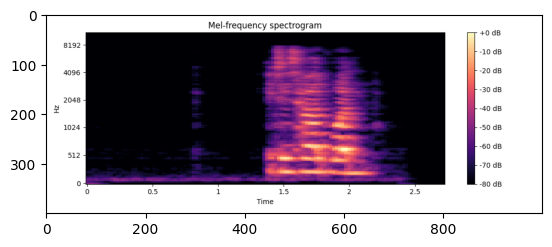

In [4]:
import numpy as np
import random
import librosa
import librosa.display
import matplotlib.pyplot as plt

def generate_mel_spectrogram(audio_file, output_file='mel-frequency.png'):
    # 讀取FLAC檔案
    y, sr = librosa.load(audio_file)

    # 計算梅爾頻譜
    mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr)

    # 轉換為分貝尺度
    mel_spectrogram_db = librosa.power_to_db(mel_spectrogram, ref=np.max)

    # 顯示梅爾頻譜圖
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(mel_spectrogram_db, sr=sr, x_axis='time', y_axis='mel')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Mel-frequency spectrogram')
    plt.tight_layout()
    
    # 儲存梅爾頻譜圖
    plt.savefig(output_file)
    plt.close()

# 請將以下路徑替換為您的FLAC檔案路徑
flac_file_path = directory_path + video[random.randint(0, len(video))]

generate_mel_spectrogram(flac_file_path)
plt.imshow(plt.imread('mel-frequency.png'))

#### 將PA資料集(train)真實的都轉成mel-frequency

Processing video: PA_T_0000001, Key: bonafide, Output folder: ./dataset/PA/PA/ASVspoof2019_PA_train/authentic
Processing video: PA_T_0000002, Key: bonafide, Output folder: ./dataset/PA/PA/ASVspoof2019_PA_train/authentic
Processing video: PA_T_0000003, Key: bonafide, Output folder: ./dataset/PA/PA/ASVspoof2019_PA_train/authentic
Processing video: PA_T_0000004, Key: bonafide, Output folder: ./dataset/PA/PA/ASVspoof2019_PA_train/authentic


KeyboardInterrupt: 

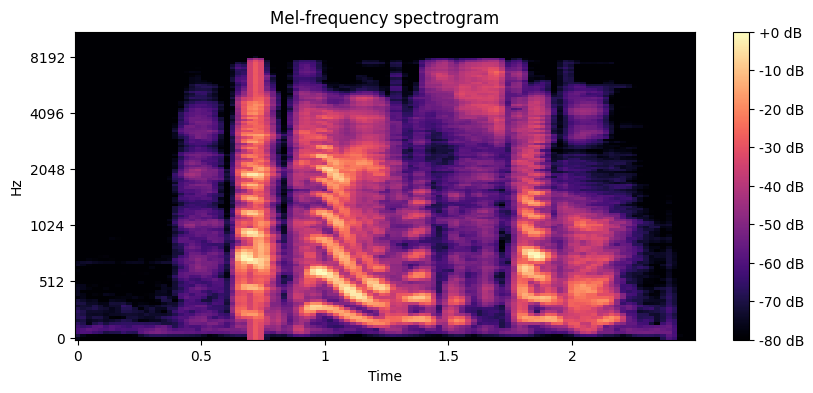

In [12]:
import os
import pandas as pd

# 請將以下路徑替換為您的資料夾路徑
output_folder_authentic = './dataset/PA/PA/ASVspoof2019_PA_train/authentic'
output_folder_fake = './dataset/PA/PA/ASVspoof2019_PA_train/fake'

# 處理每個影片並存儲梅爾頻譜圖
for index, row in df.iloc[:5400].iterrows():
    filename = row['AUDIO_FILE_NAME']
    key = row['KEY(Classification)']

    # 指定輸出資料夾
    output_folder = output_folder_authentic if key == 'bonafide' else output_folder_fake
    # 執行影片轉換為梅爾頻譜圖的操作
    generate_mel_spectrogram(os.path.join(directory_path, filename + '.flac'), os.path.join(output_folder, filename + '.png'))
    print(f'Processing video: {filename}, Key: {key}, Output folder: {output_folder}')


#### 將PA資料集(train)假的隨機抽樣完轉成mel-frequency

In [15]:
import pandas as pd

output_folder_authentic = './dataset/PA/PA/ASVspoof2019_PA_train/authentic'
output_folder_fake = './dataset/PA/PA/ASVspoof2019_PA_train/fake'

# Filter the data based on the conditions
filtered_data = df[(df['KEY(Classification)'] == 'spoof') & (df['ATTACK_ID'].isin(['AB', 'BB', 'CB']))]

# Get unique environment IDs
unique_environment_ids = set(df['ENVIRONMENT_ID'])

# Create a dictionary to store sampled data
sampled_data = {}

# Iterate over unique environment IDs
for env_id in unique_environment_ids:
    # Get data for the current environment ID
    env_data = filtered_data[filtered_data['ENVIRONMENT_ID'] == env_id]
    
    # Randomly sample 300 rows
    sampled_rows = env_data.sample(n=300, random_state=42)  # Adjust the random_state as needed
    
    # Add the sampled rows to the dictionary
    sampled_data[env_id] = sampled_rows

# Combine the sampled data into a single DataFrame
sampled_df = pd.concat(sampled_data.values())

# Now sampled_df contains 300 randomly sampled rows for each environment ID
print(sampled_df.head())
sampled_df.to_csv(output_folder_fake + '/sampled_data.csv', index=False)

      SPEAKER_ID AUDIO_FILE_NAME ENVIRONMENT_ID ATTACK_ID KEY(Classification)
18358    PA_0088    PA_T_0018359            acb        AB               spoof
19143    PA_0094    PA_T_0019144            acb        BB               spoof
19641    PA_0093    PA_T_0019642            acb        CB               spoof
18325    PA_0085    PA_T_0018326            acb        AB               spoof
18429    PA_0093    PA_T_0018430            acb        AB               spoof


In [ ]:
# 處理每個影片並存儲梅爾頻譜圖
for index, row in sampled_df.iterrows():
    filename = row['AUDIO_FILE_NAME']
    key = row['KEY(Classification)']

    # 指定輸出資料夾
    output_folder = output_folder_authentic if key == 'bonafide' else output_folder_fake
    # 執行影片轉換為梅爾頻譜圖的操作
    generate_mel_spectrogram(os.path.join(directory_path, filename + '.flac'), os.path.join(output_folder, filename + '.png'))
    print(f'Processing video: {filename}, Key: {key}, Output folder: {output_folder}')


#### 將PA資料集(Eval) 隨機抽取來當作test data

In [7]:
import pandas as pd
# 是真人語音的資料
bonafide_rows = df[df['KEY(Classification)'] == 'bonafide']
bonafide_sample = bonafide_rows.sample(n=500, random_state=42)

# 是Deepfake的資料
spoof_rows = df[df['KEY(Classification)'] == 'spoof']
spoof_sample = spoof_rows.sample(n=500, random_state=42)

# 合併dataframe
merged_df = pd.concat([bonafide_sample, spoof_sample])
print(merged_df.head())

       SPEAKER_ID AUDIO_FILE_NAME ENVIRONMENT_ID ATTACK_ID KEY(Classification)
20921     PA_0006    PA_E_0021337            cac         -            bonafide
90687     PA_0007    PA_E_0092499            acb         -            bonafide
132218    PA_0016    PA_E_0134894            abc         -            bonafide
24685     PA_0001    PA_E_0025183            aaa         -            bonafide
43547     PA_0037    PA_E_0044405            cac         -            bonafide


In [ ]:
import pandas as pd

output_folder_authentic = './dataset/PA/PA/ASVspoof2019_PA_eval/authentic'
output_folder_fake = './dataset/PA/PA/ASVspoof2019_PA_eval/fake'

# 處理每個影片並存儲梅爾頻譜圖
for index, row in merged_df.iterrows():
    filename = row['AUDIO_FILE_NAME']
    key = row['KEY(Classification)']

    # 指定輸出資料夾
    output_folder = output_folder_authentic if key == 'bonafide' else output_folder_fake
    # 執行影片轉換為梅爾頻譜圖的操作
    generate_mel_spectrogram(os.path.join(directory_path, filename + '.flac'), os.path.join(output_folder, filename + '.png'))
    print(f'Processing video: {filename}, Key: {key}, Output folder: {output_folder}')


#### 將PA資料集(dev) 隨機取3500張

In [19]:
dev_sample = df.sample(n=3500, random_state=42)

import pandas as pd

output_folder_authentic = './dataset/PA/PA/ASVspoof2019_PA_dev/classification/authentic'
output_folder_fake = './dataset/PA/PA/ASVspoof2019_PA_dev/classification/fake'

# 處理每個影片並存儲梅爾頻譜圖
for index, row in dev_sample.iterrows():
    filename = row['AUDIO_FILE_NAME']
    key = row['KEY(Classification)']

    # 指定輸出資料夾
    output_folder = output_folder_authentic if key == 'bonafide' else output_folder_fake
    # 執行影片轉換為梅爾頻譜圖的操作
    generate_mel_spectrogram(os.path.join(directory_path, filename + '.flac'), os.path.join(output_folder, filename + '.png'))
    print(f'Processing video: {filename}, Key: {key}, Output folder: {output_folder}')


Processing video: PA_D_0027780, Key: spoof, Output folder: ./dataset/PA/PA/ASVspoof2019_PA_dev/classification/fake
Processing video: PA_D_0002993, Key: bonafide, Output folder: ./dataset/PA/PA/ASVspoof2019_PA_dev/classification/authentic
Processing video: PA_D_0013125, Key: spoof, Output folder: ./dataset/PA/PA/ASVspoof2019_PA_dev/classification/fake
Processing video: PA_D_0023493, Key: spoof, Output folder: ./dataset/PA/PA/ASVspoof2019_PA_dev/classification/fake
Processing video: PA_D_0007603, Key: spoof, Output folder: ./dataset/PA/PA/ASVspoof2019_PA_dev/classification/fake
Processing video: PA_D_0008159, Key: spoof, Output folder: ./dataset/PA/PA/ASVspoof2019_PA_dev/classification/fake
Processing video: PA_D_0026364, Key: spoof, Output folder: ./dataset/PA/PA/ASVspoof2019_PA_dev/classification/fake
Processing video: PA_D_0006272, Key: spoof, Output folder: ./dataset/PA/PA/ASVspoof2019_PA_dev/classification/fake
Processing video: PA_D_0012368, Key: spoof, Output folder: ./dataset/PA/

In [6]:
# 發現不夠再額外取樣
bonafide_rows = df[df['KEY(Classification)'] == 'bonafide']
samples = bonafide_rows.sample(n=3500, random_state=42)

output_folder_authentic = './dataset/PA/PA/ASVspoof2019_PA_dev/classification/authentic'
output_folder_fake = './dataset/PA/PA/ASVspoof2019_PA_dev/classification/fake'

# 處理每個影片並存儲梅爾頻譜圖
for index, row in samples.iterrows():
    filename = row['AUDIO_FILE_NAME']
    key = row['KEY(Classification)']

    # 指定輸出資料夾
    output_folder = output_folder_authentic if key == 'bonafide' else output_folder_fake
    # 執行影片轉換為梅爾頻譜圖的操作
    generate_mel_spectrogram(os.path.join(directory_path, filename + '.flac'), os.path.join(output_folder, filename + '.png'))
    print(f'Processing video: {filename}, Key: {key}, Output folder: {output_folder}')


Processing video: PA_D_0001384, Key: bonafide, Output folder: ./dataset/PA/PA/ASVspoof2019_PA_dev/classification/authentic
Processing video: PA_D_0003046, Key: bonafide, Output folder: ./dataset/PA/PA/ASVspoof2019_PA_dev/classification/authentic
Processing video: PA_D_0002852, Key: bonafide, Output folder: ./dataset/PA/PA/ASVspoof2019_PA_dev/classification/authentic
Processing video: PA_D_0002115, Key: bonafide, Output folder: ./dataset/PA/PA/ASVspoof2019_PA_dev/classification/authentic
Processing video: PA_D_0001363, Key: bonafide, Output folder: ./dataset/PA/PA/ASVspoof2019_PA_dev/classification/authentic
Processing video: PA_D_0003800, Key: bonafide, Output folder: ./dataset/PA/PA/ASVspoof2019_PA_dev/classification/authentic
Processing video: PA_D_0000507, Key: bonafide, Output folder: ./dataset/PA/PA/ASVspoof2019_PA_dev/classification/authentic
Processing video: PA_D_0001418, Key: bonafide, Output folder: ./dataset/PA/PA/ASVspoof2019_PA_dev/classification/authentic
Processing video